Examine principal component analysis of dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
TRAIN_DATA_PATH = "/content/drive/My Drive/cs189 practicum/cs189 code/pollutionTrain.csv"
TEST_DATA_PATH = "/content/drive/My Drive/cs189 practicum/cs189 code/pollutionTest.csv"

### DATA SETUP

In [3]:
trainPD = pd.read_csv(TRAIN_DATA_PATH)
testPD = pd.read_csv(TEST_DATA_PATH)

trainPD = trainPD.fillna(0)
testPD = testPD.fillna(0)

In [4]:
label_cols = ['target']

# relevant features chosen based on 1) data context and 
# 2) the SequentialFeatureSelector in regression.ipynb.
feature_cols = [
                'precipitable_water_entire_atmosphere',
                'relative_humidity_2m_above_ground',
                'temperature_2m_above_ground',
                'u_component_of_wind_10m_above_ground',
                'v_component_of_wind_10m_above_ground',
                'L3_NO2_NO2_column_number_density',
                'L3_NO2_NO2_slant_column_number_density',
                'L3_NO2_absorbing_aerosol_index',
                'L3_NO2_tropopause_pressure',
                'L3_O3_O3_column_number_density',
                'L3_CO_CO_column_number_density',
                'L3_CO_cloud_height',
                'L3_CO_H2O_column_number_density',
                'L3_HCHO_tropospheric_HCHO_column_number_density',
                'L3_SO2_SO2_column_number_density',
]

In [15]:
# partition features matrix and target matrix 
X = trainPD[feature_cols]
y = trainPD[label_cols]

# PCA

In [16]:
pca = PCA()
pca.fit(X)
print('explained variance:')
print(pca.explained_variance_)

explained variance:
[5.76957006e+07 2.08601026e+06 6.11070168e+05 3.60906714e+02
 8.21726152e+01 1.54273344e+01 7.81917010e+00 5.87237107e+00
 2.77223956e-01 6.95660907e-04 1.88324698e-04 6.14912079e-07
 1.37037454e-08 5.22426507e-09 1.48543031e-09]


In [17]:
# project dataset onto PCA components
projected_pca = pca.transform(X)

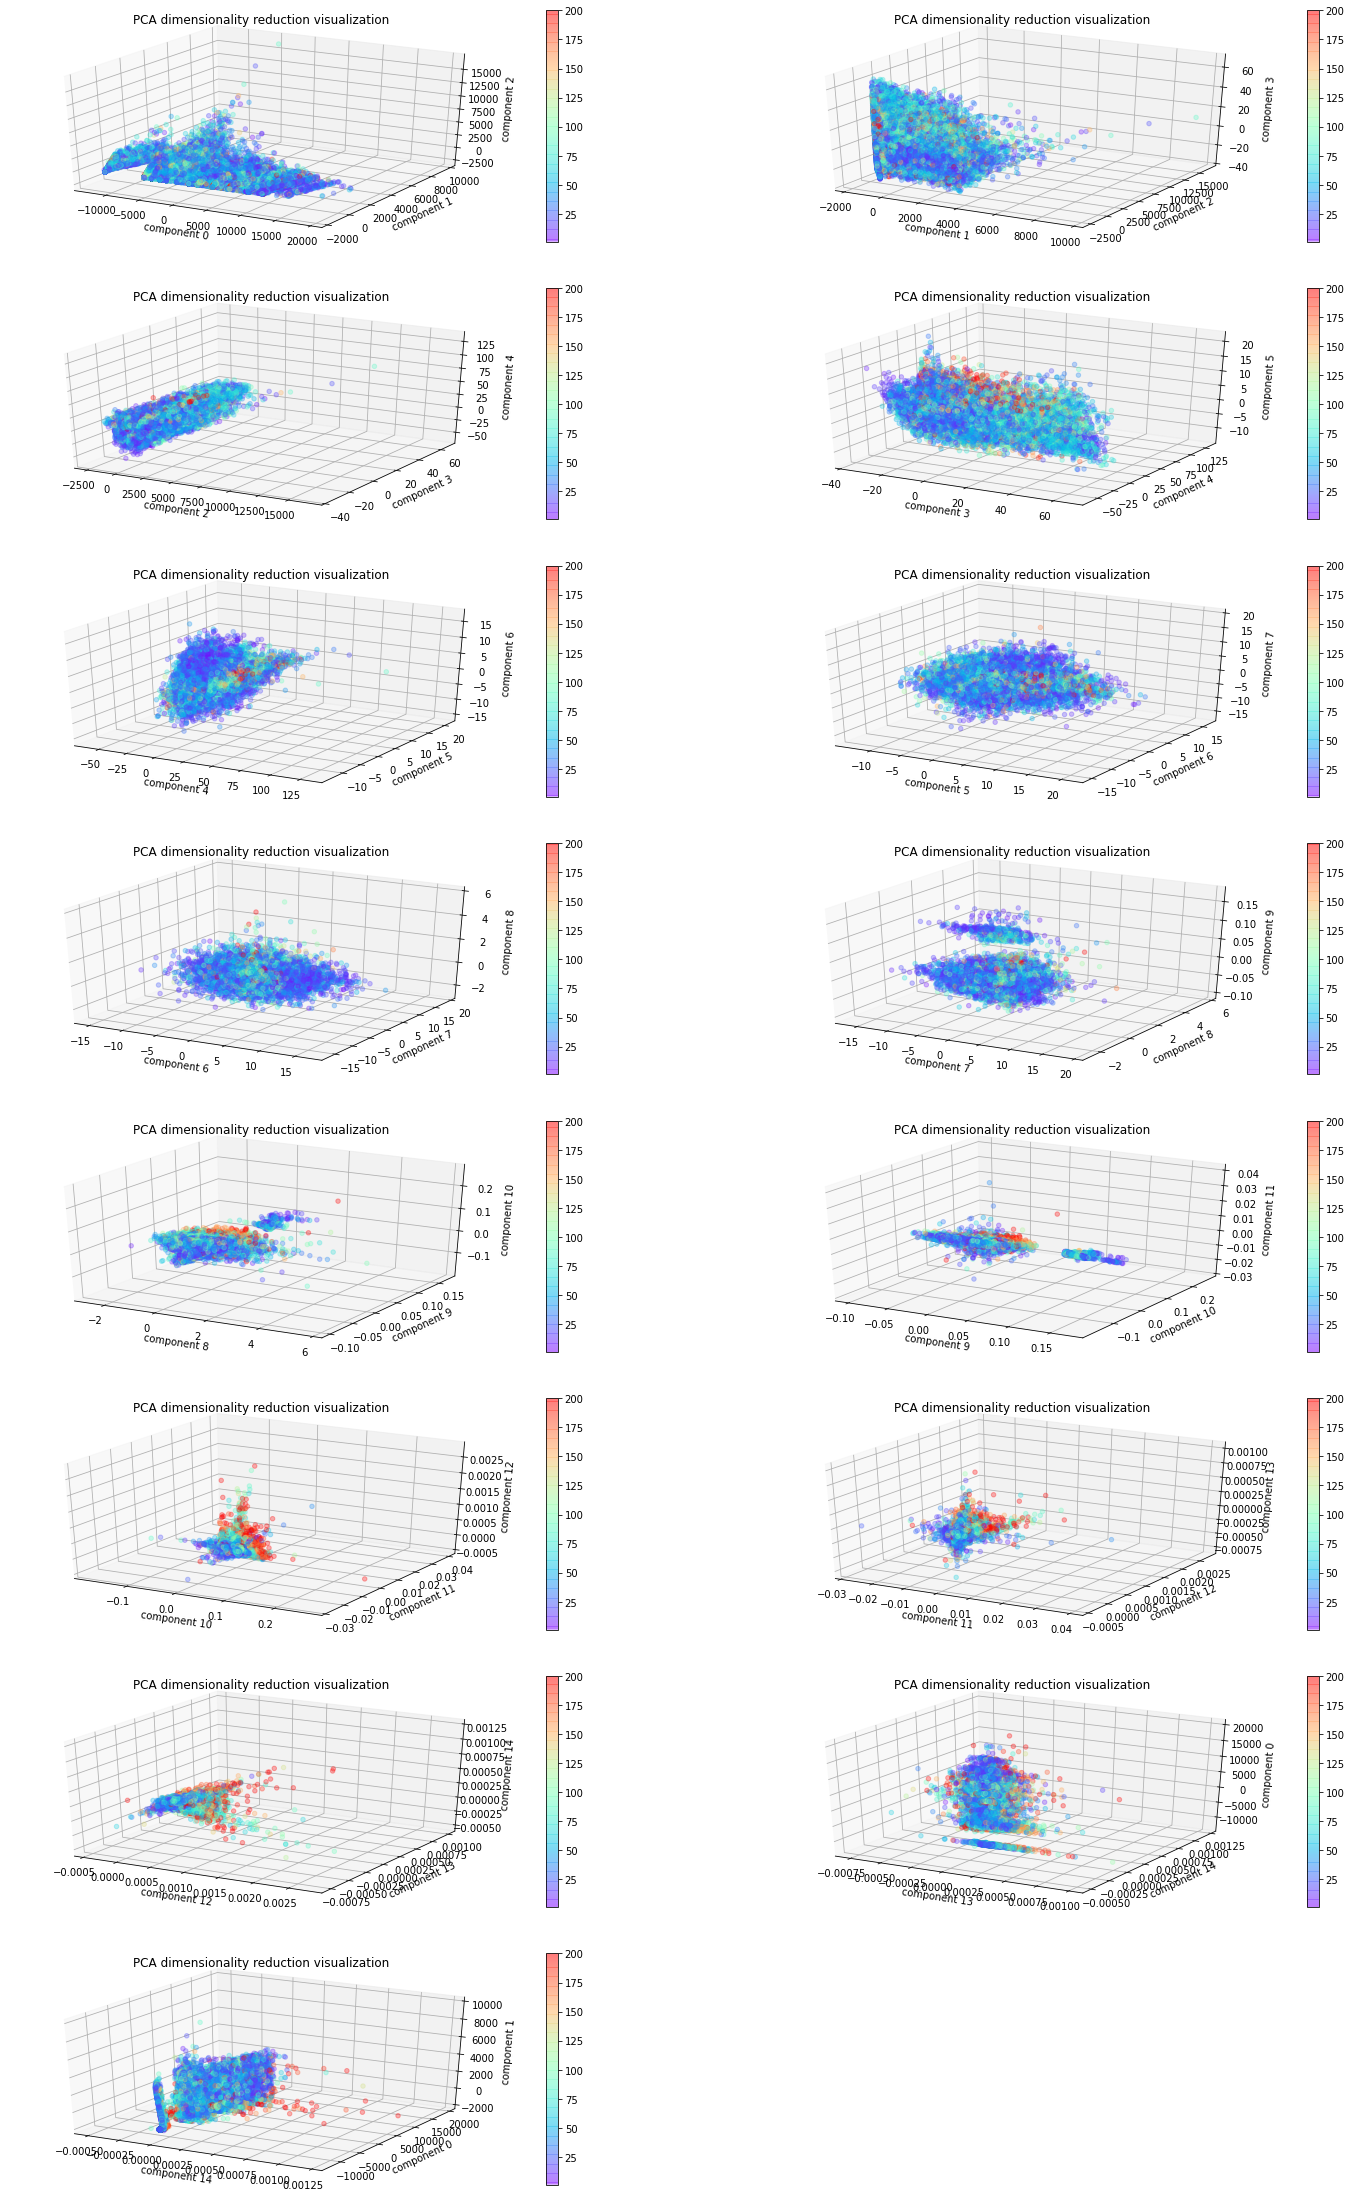

In [20]:
# visualize dataset projected onto PCA components
fig = plt.figure(figsize=(25, 40))

for i in range(15):
  ax = fig.add_subplot(8, 2, i+1, projection='3d')

  x_idx = i % 15
  y_idx = (i + 1) % 15
  z_idx = (i + 2) % 15

  xdata = projected_pca[:, x_idx]
  ydata = projected_pca[:, y_idx]
  zdata = projected_pca[:, z_idx]
  c=y['target']
  cmap_adjusted = plt.cm.get_cmap('rainbow')

  # note: the actual range for 'target' is from 10 to the 800s, but highly 
  # left-skewed - from the histogram, it looks like ~70% of the data is <90.
  # Thus, we set vmax=200 for better visualization/distinction between smaller
  # values.
  p = ax.scatter3D(xdata, ydata, zdata, c=c, alpha=0.3, vmax=200, 
              cmap=plt.cm.get_cmap('rainbow'));

  ax.set_xlabel('component ' + str(x_idx))
  ax.set_ylabel('component ' + str(y_idx))
  ax.set_zlabel('component ' + str(z_idx))
  fig.colorbar(p);
  ax.set_title('PCA dimensionality reduction visualization');

## Explained variance ratio curve

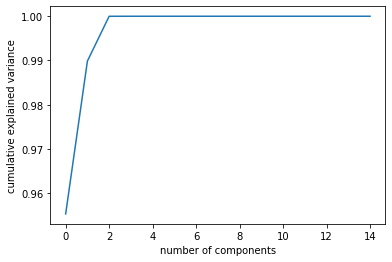

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This graph is a good reminder that, for this particular dataset, the important features based on the *context* of the data often have very tiny variances (paricularly pollutant concentrations). Thus, even though PCA is able to pick out the components with the highest explained variance, this is *not necessarily useful for our task*. 